In [73]:
import pandas as pd  
import numpy as np

# Define Indian healthcare data with duplicates and missing values  
data = {
    "Patient_ID": [201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 
                   202, 204, 206, 208, 209],  # Duplicates included
    "Name": ["Rajesh Kumar", "Priya Sharma", "Arjun Verma", "Unknown", "Vikram Singh",
             "Ananya Iyer", "Rohan Das", "Unknown", "Suresh Reddy", "Kavita Joshi",
             "Priya Sharma", "Unknown", "Ananya Iyer", "Unknown", "Suresh Reddy"],  # Duplicate & missing names
    "Age": [50, 42, 38, 23, 47, 36, None, 48, 60, 39,  # Missing Age
            42, 23, None, 48, 60],  
    "Gender": ["Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Female",
               "Female", "Male", "Female", "Male", "Male"],  
    "Diagnosis": ["Diabetss", "Hypertens", "Heart Disease", "Flu", "Heart Disease",
                  "Healthy", "Diabetss", "Healthy", "Flu", "Asthma",  # Missing & duplicate diagnoses
                  "Hypertension", "Flu", None, "Healthy", "Flu"],  
    "Medication": ["Metformin", "Amlodipine", "Aspirin", "Oseltamivir", "Unknown",
                    "Metformin", "Amlodipine", "Unknown", "Oseltamivir", "Aspirin",
                    "Amlodipine", "Oseltamivir", "Unknown", "Unknown", "Aspirin"],  
    "Visit_Date": ["01-10-2023", "15-11-2023", "NULL", "01-12-2023", "10-12-2023",
                    "20-10-2023", "NULL", "05-12-2023", "NULL", "25-11-2023",
                    "15-11-2023", "01-12-2023", "NULL", "05-12-2023", "NULL"]
}

# Convert to DataFrame  
df = pd.DataFrame(data)

# Replace NaN values with 'None'
df = df.where(pd.notna(df), None)

# Save to CSV file  
csv_filename = "indian_healthcare_data_dirty.csv"
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' has been created successfully!")


CSV file 'indian_healthcare_data_dirty.csv' has been created successfully!


In [75]:
import pandas as pd  

# Read the CSV file  
df = pd.read_csv("indian_healthcare_data_dirty.csv")

# Replace NaN values with "None" or "Missing"  
df = df.fillna("None")  # Change to "None" if needed

# Display the entire dataset  
print("Healthcare Data from CSV:\n")
print(df.to_string(index=False))  # Ensures full table display without truncation





Healthcare Data from CSV:

 Patient_ID         Name   Age Gender     Diagnosis  Medication Visit_Date
        201 Rajesh Kumar  50.0   Male      Diabetss   Metformin 01-10-2023
        202 Priya Sharma  42.0 Female     Hypertens  Amlodipine 15-11-2023
        203  Arjun Verma  38.0   Male Heart Disease     Aspirin       None
        204      Unknown  23.0   Male           Flu Oseltamivir 01-12-2023
        205 Vikram Singh  47.0   Male Heart Disease     Unknown 10-12-2023
        206  Ananya Iyer  36.0 Female       Healthy   Metformin 20-10-2023
        207    Rohan Das  None   Male      Diabetss  Amlodipine       None
        208      Unknown  48.0   Male       Healthy     Unknown 05-12-2023
        209 Suresh Reddy  60.0   Male           Flu Oseltamivir       None
        210 Kavita Joshi  39.0 Female        Asthma     Aspirin 25-11-2023
        202 Priya Sharma  42.0 Female  Hypertension  Amlodipine 15-11-2023
        204      Unknown  23.0   Male           Flu Oseltamivir 01-12-202

In [77]:
import pandas as pd  

# Load the dataset from CSV  
df = pd.read_csv("indian_healthcare_data_dirty.csv")  

# Replace NaN values with 'None' explicitly  
df = df.where(pd.notna(df), None)

# Replace invalid values in 'Age' (-1) and fill missing 'Name' and 'Diagnosis'  
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').replace(-1, None).fillna(df['Age'].median())  
df['Name'] = df['Name'].fillna('Unknown')  
df['Diagnosis'] = df['Diagnosis'].fillna('Unknown')  

# Add 'Medication' column if it doesn't exist  
if 'Medication' not in df.columns:  
    df['Medication'] = 'Unknown'  # Default to 'Unknown' if column is missing  
else:  
    df['Medication'] = df['Medication'].fillna('Unknown')  # Fill missing values  

# Ensure 'Visit_Date' missing values are explicitly replaced with 'NULL'  
if 'Visit_Date' not in df.columns:  
    df['Visit_Date'] = 'NULL'  # Create column with default 'NULL' if not present  
else:  
    df['Visit_Date'] = df['Visit_Date'].fillna('NULL')  # Replace NaN with 'NULL'  

# Display the cleaned dataset  
print("After Handling Missing Values:\n")
print(df.to_string(index=False))  # Display full table without truncation


After Handling Missing Values:

 Patient_ID         Name  Age Gender     Diagnosis  Medication Visit_Date
        201 Rajesh Kumar 50.0   Male      Diabetss   Metformin 01-10-2023
        202 Priya Sharma 42.0 Female     Hypertens  Amlodipine 15-11-2023
        203  Arjun Verma 38.0   Male Heart Disease     Aspirin       NULL
        204      Unknown 23.0   Male           Flu Oseltamivir 01-12-2023
        205 Vikram Singh 47.0   Male Heart Disease     Unknown 10-12-2023
        206  Ananya Iyer 36.0 Female       Healthy   Metformin 20-10-2023
        207    Rohan Das 42.0   Male      Diabetss  Amlodipine       NULL
        208      Unknown 48.0   Male       Healthy     Unknown 05-12-2023
        209 Suresh Reddy 60.0   Male           Flu Oseltamivir       NULL
        210 Kavita Joshi 39.0 Female        Asthma     Aspirin 25-11-2023
        202 Priya Sharma 42.0 Female  Hypertension  Amlodipine 15-11-2023
        204      Unknown 23.0   Male           Flu Oseltamivir 01-12-2023
      

In [79]:
import pandas as pd  

# Load the dataset from CSV  
df = pd.read_csv("indian_healthcare_data_dirty.csv")  

# Drop duplicate records based on Patient_ID and Name to ensure unique patients  
df = df.drop_duplicates(subset=["Patient_ID", "Name"], keep="first")

# Reset index after dropping duplicates
df.reset_index(drop=True, inplace=True)

# Replace NaN values with 'None'
df = df.where(pd.notna(df), 'None')

# Display the cleaned data  
print("After Removing Duplicates:\n", df)


After Removing Duplicates:
    Patient_ID          Name   Age  Gender      Diagnosis   Medication  \
0         201  Rajesh Kumar  50.0    Male       Diabetss    Metformin   
1         202  Priya Sharma  42.0  Female      Hypertens   Amlodipine   
2         203   Arjun Verma  38.0    Male  Heart Disease      Aspirin   
3         204       Unknown  23.0    Male            Flu  Oseltamivir   
4         205  Vikram Singh  47.0    Male  Heart Disease      Unknown   
5         206   Ananya Iyer  36.0  Female        Healthy    Metformin   
6         207     Rohan Das  None    Male       Diabetss   Amlodipine   
7         208       Unknown  48.0    Male        Healthy      Unknown   
8         209  Suresh Reddy  60.0    Male            Flu  Oseltamivir   
9         210  Kavita Joshi  39.0  Female         Asthma      Aspirin   

   Visit_Date  
0  01-10-2023  
1  15-11-2023  
2        None  
3  01-12-2023  
4  10-12-2023  
5  20-10-2023  
6        None  
7  05-12-2023  
8        None  
9  25-11

In [83]:
import pandas as pd
import spacy

# Load the dataset from CSV
df = pd.read_csv("indian_healthcare_data_dirty.csv")

# Drop duplicate records based on Patient_ID and Name to ensure unique patients
df = df.drop_duplicates(subset=["Patient_ID", "Name"], keep="first")

# Reset index after dropping duplicates
df.reset_index(drop=True, inplace=True)

# Replace NaN values with 'None'
df = df.where(pd.notna(df), 'None')

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Predefined mapping for diagnosis normalization
diagnosis_mapping = {
    "Diabetss": "Diabetes",
    "Hypertens": "Hypertension",
    "Coronry Artery Ds": "Coronary Artery Disease",
    "Flu": "Influenza"
}

# Normalize Diagnosis
df['Diagnosis'] = df['Diagnosis'].apply(lambda x: diagnosis_mapping.get(x, x))

# Display the cleaned data
print("After Normalizing Diagnoses:\n", df.to_string(index=False))


After Normalizing Diagnoses:
  Patient_ID         Name   Age Gender     Diagnosis  Medication Visit_Date
        201 Rajesh Kumar  50.0   Male      Diabetes   Metformin 01-10-2023
        202 Priya Sharma  42.0 Female  Hypertension  Amlodipine 15-11-2023
        203  Arjun Verma  38.0   Male Heart Disease     Aspirin       None
        204      Unknown  23.0   Male     Influenza Oseltamivir 01-12-2023
        205 Vikram Singh  47.0   Male Heart Disease     Unknown 10-12-2023
        206  Ananya Iyer  36.0 Female       Healthy   Metformin 20-10-2023
        207    Rohan Das  None   Male      Diabetes  Amlodipine       None
        208      Unknown  48.0   Male       Healthy     Unknown 05-12-2023
        209 Suresh Reddy  60.0   Male     Influenza Oseltamivir       None
        210 Kavita Joshi  39.0 Female        Asthma     Aspirin 25-11-2023


In [85]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 409.6 kB/s eta 0:00:32
     --------------------------------------- 0.1/12.8 MB 416.7 kB/s eta 0:00:31
     --------------------------------------- 0.1/12.8 MB 514.3 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.8 MB 655.4 kB/s eta 0:00:20
      -------------------------------------- 0.2/12.8 MB 758.5 kB/s eta 0:00:17
      -------------------------------------- 0.3/12.8 MB 871.5 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.8 MB 983.0 kB/s eta 0:00:13
     - -------------------------------------- 0.5/12.8 MB 1.0 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s

In [87]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

In [89]:
import spacy
print(spacy.info())

{'spacy_version': '3.8.4', 'location': 'C:\\Users\\SPANDANA\\anaconda3\\Lib\\site-packages\\spacy', 'platform': 'Windows-11-10.0.22631-SP0', 'python_version': '3.12.4', 'pipelines': {'en_core_web_sm': '3.8.0'}}


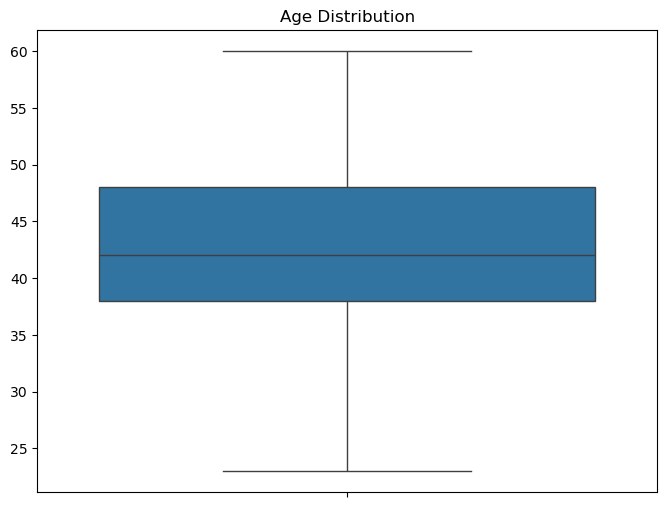

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data['Age'])
plt.title("Age Distribution")
plt.show()

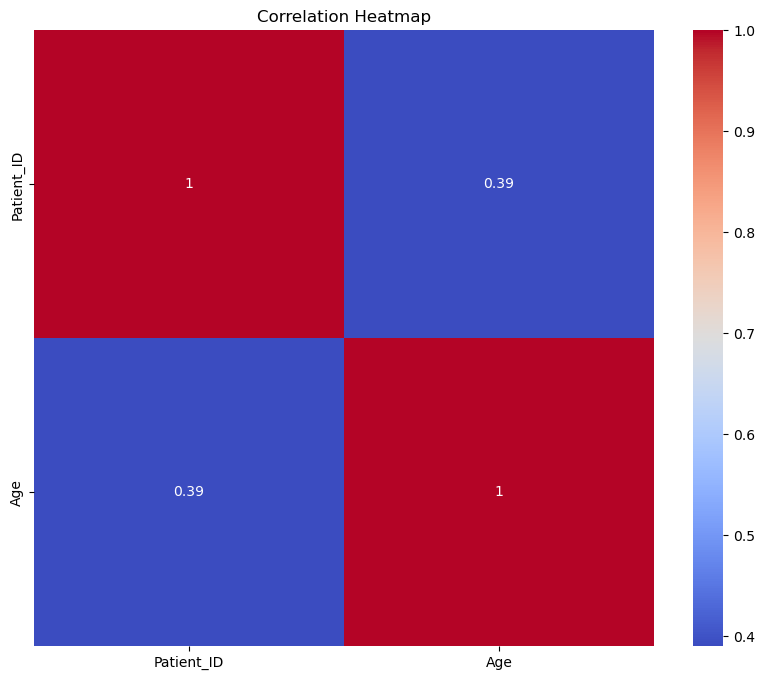

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Add pandas import

# Convert dictionary to DataFrame if data is a dictionary
data = pd.DataFrame(data)  # Convert dict to DataFrame

# Ensure you're using only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Optional: Handle missing values
numeric_data = numeric_data.fillna(numeric_data.median())

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [101]:
# Save cleaned dataset to CSV
data.to_csv("cleaned_healthcare_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_healthcare_data.csv'")

Cleaned dataset saved as 'cleaned_healthcare_data.csv'
